# Chinese Text into Image
-----------
### Step 1: Input text and title

In the bottom cells, you may find the `TEXT` variable. Input your desired text there.
If you wish to manually seperate two paragraphs from one page, you may use `<br>` as an independent paragraph. This will start a new page.

```
TEXT = '''奶粉，白色的粉末，
滋養嬰兒，成就未來。
初生嬰兒，純真無邪，
母乳難得，奶粉來替。

愛，如奶粉般滋養，
陪伴嬰兒，成長茁壯。
家人的關愛，如奶粉般溫暖，
讓我們茁壯成長，支持著我們的未來。

恨，如奶粉般複雜，
假貨橫行，毒奶事件層出不窮。
嬰兒的健康，如奶粉般珍貴，
卻被不負責任的商家，輕易地犧牲。

<br>

奶粉，愛恨交織的代表，
滋養著嬰兒，卻也蘊藏著危險。
但願我們的愛，能像奶粉般純淨，
讓所有的嬰兒，都能健康茁壯成長。'''
```

For title, 
```
TITLE = "奶粉"

```


-------------
### Step 2: Select attributes

There are many attributes to select from.

#### 1. PAGE

    This is the size of the canvas.
    
    (Default: 1080, 1080)

#### 2. MARGIN

    This is the margin of the canvas.
    Note: Right margin is not yet implemented, but can be controlled by the MAX_LINE_LENGTH

    (Default: 108, 103)

#### 3. MAX_LINE_LENGTH

    The maximum amount of characters per paragraph.
    
    (Default: 27)

#### 4. FONT_SIZE

    Font size of text in pixels

    (Default : 35)

#### 5. LINE_SPACING

    Amount of space between each line of text

    (Default: 53.5 - FONT_SIZE)

#### 6. FONT

    Pillow's ImageFont.truetype function. Can be changed to other fonts in your local directory.

    (Default: `ImageFont.truetype('./font/NotoSansTC-Regular.otf', size=FONT_SIZE)`)

#### 7. BASE_COLOR

    The Base Color of the Canvas.

    (Default: #ffffff)

#### 8. TEXT_COLOR

    The Color of the Text.

    (Default: #324450)

#### 9. isJPTWStyledPunctuation

    Puts the comma and period of the sentence to the bottom left corner, instead of being in the middle.

    (Default: True)

------


In [33]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
import re
import os
import shutil

In [34]:
# Define the page size and margin
PAGE = {"x": 1080, "y": 1080}
MARGIN = {"x": 108, "y": 103}
MAX_LINE_LENGTH = 25

# Define the font and size
FONT_SIZE = 35
LINE_SPACING = 63 - FONT_SIZE
PARAGRAPH_SPACING = LINE_SPACING + FONT_SIZE

FONT = ImageFont.truetype('./font/NotoSansTC-Regular.otf', size=FONT_SIZE)

# Color Settings
BASE_COLOR = "#ffffff"
TEXT_COLOR = "#324450"

# Whether JPTW Styled Punctuation will be used
isJPTWStyledPunctuation = True

In [35]:
# Define the text
TITLE = "觀劇"

TEXT = '''有時候,人最忌諱的就是深知自己的不足。

我看了場場電影,舞台下的我,卻連自己都騙不過。

當演員演出一個又一個誇張的風景,營造一個又一個假象,我不禁大笑出聲。

笑他表演之高明,笑他情節之誇張,但笑聲裡夾雜最多的,卻是對自己的蔑視。

我知道,自己與那銀幕上虛構的人物,可都差遠了。

他們定能為愛殉情,為夢奮鬥;而我只會畏首畏尾,半途而廢。

他們住在一片豐富的情感世界,我則缺乏最基本的勇氣與熱情。

我討厭自己連「表演」這個字都難以成為自己,更討厭自己連欺騙他人都做不好。

人生如影劇般,我卻連戲份都分不到,只能坐在最後排,以最刺耳的笑聲, 恥笑自己的渺小。

有時,我真想成為銀幕那樣的「人」。

為夢想奮鬥一番,為愛而生,為情而死,就算一敗塗地,也好過現在這無聊透頂的平凡日子。

但或許,最深的笑才是對我的最恰當評價。

因為我才發現,自己不論如何嘗試,終究只配做一個戲院裡最後排的「觀眾」。'''

------

# Code

------

In [36]:
# Process UTF
def processIllegalChar(text):
    output = text
    output = output.replace("爲", "為")
    output = output.replace("僞", "偽")
    output = output.replace("軽", "輕")
    output = output.replace(" ", "")
    output = output.replace(",", "，")
    output = output.replace("?", "？")
    output = output.replace("!", "！")
    output = output.replace(":", "：")
    output = output.replace(";", "；")
    output = output.replace("(", "（")
    output = output.replace(")", "）")
    return output

In [37]:
# Process formatting of text
PROC_TEXT = processIllegalChar(TEXT)
print(PROC_TEXT)
PROC_TEXT = processIllegalChar(TEXT).replace("\n\n", "LINEBREAK")
PROC_TEXT = PROC_TEXT.replace("\n", "")

有時候，人最忌諱的就是深知自己的不足。

我看了場場電影，舞台下的我，卻連自己都騙不過。

當演員演出一個又一個誇張的風景，營造一個又一個假象，我不禁大笑出聲。

笑他表演之高明，笑他情節之誇張，但笑聲裡夾雜最多的，卻是對自己的蔑視。

我知道，自己與那銀幕上虛構的人物，可都差遠了。

他們定能為愛殉情，為夢奮鬥；而我只會畏首畏尾，半途而廢。

他們住在一片豐富的情感世界，我則缺乏最基本的勇氣與熱情。

我討厭自己連「表演」這個字都難以成為自己，更討厭自己連欺騙他人都做不好。

人生如影劇般，我卻連戲份都分不到，只能坐在最後排，以最刺耳的笑聲，恥笑自己的渺小。

有時，我真想成為銀幕那樣的「人」。

為夢想奮鬥一番，為愛而生，為情而死，就算一敗塗地，也好過現在這無聊透頂的平凡日子。

但或許，最深的笑才是對我的最恰當評價。

因為我才發現，自己不論如何嘗試，終究只配做一個戲院裡最後排的「觀眾」。


In [38]:
# Seperate the program to paragraphs
raw_paragraphs = PROC_TEXT.split("LINEBREAK")
paragraphs = []
for p in raw_paragraphs:
    if p[0] == '*':
        paragraphs[-1] += f"{p[1:]}\n\n"
    else:
        p = p.replace("。", "。\n")
        p = p.replace("？", "？\n")
        p = p.replace("！", "！\n")
        p = p.replace("\n」", '」\n')

        p = p.replace("。\n*", "。\n")
        p = p.replace("？\n*", "？\n")
        p = p.replace("！\n*", "！\n")
        p = p.replace("」\n*", "」\n")

        if p[-1] != '\n':
            p += '\n'
        paragraphs.append(f"{p}")



def getCommaSeperated(text):
    # Check if the line is exceedingly long
    text_list = text.split('，')
    output = []

    new_line = ""

    for i in range(len(text_list)):
        if len(new_line) + len(text_list[i]) + 1 > MAX_LINE_LENGTH + 1:
            output.append(new_line)

            # Reset
            new_line = ""
        new_line += text_list[i] + '，'
    output.append(new_line[:-1])
    return output


print("-----------------------")

def fixParagraphs(paragraphs):
    def fixParagraph(paragraph):
        output = []
        lines = paragraph.split('\n')
        for line in lines:
            output.append("\n".join(getCommaSeperated(line)))
        
        return "\n".join(output)

    for i in range(len(paragraphs)):
        paragraphs[i] = fixParagraph(paragraphs[i])
    return paragraphs
paragraphs = fixParagraphs(paragraphs)

print(paragraphs)

-----------------------
['有時候，人最忌諱的就是深知自己的不足。\n', '我看了場場電影，舞台下的我，卻連自己都騙不過。\n', '當演員演出一個又一個誇張的風景，營造一個又一個假象，\n我不禁大笑出聲。\n', '笑他表演之高明，笑他情節之誇張，但笑聲裡夾雜最多的，\n卻是對自己的蔑視。\n', '我知道，自己與那銀幕上虛構的人物，可都差遠了。\n', '他們定能為愛殉情，為夢奮鬥；而我只會畏首畏尾，\n半途而廢。\n', '他們住在一片豐富的情感世界，\n我則缺乏最基本的勇氣與熱情。\n', '我討厭自己連「表演」這個字都難以成為自己，\n更討厭自己連欺騙他人都做不好。\n', '人生如影劇般，我卻連戲份都分不到，只能坐在最後排，\n以最刺耳的笑聲，恥笑自己的渺小。\n', '有時，我真想成為銀幕那樣的「人」。\n', '為夢想奮鬥一番，為愛而生，為情而死，就算一敗塗地，\n也好過現在這無聊透頂的平凡日子。\n', '但或許，最深的笑才是對我的最恰當評價。\n', '因為我才發現，自己不論如何嘗試，\n終究只配做一個戲院裡最後排的「觀眾」。\n']


In [39]:
def getPageName(page_index):
    return f"output/{TITLE}/{page_index}.png"

In [40]:
def getParagraphHeight(paragraph):
    line_count = len(paragraph.split("\n")) - 2
    
    return line_count * (LINE_SPACING + FONT_SIZE)

In [41]:
# Reset Directory

try:
    shutil.rmtree(f"./output/{TITLE}")
except:
    pass
os.mkdir(f"./output/{TITLE}")

------

# Output

------

output/觀劇/2.png


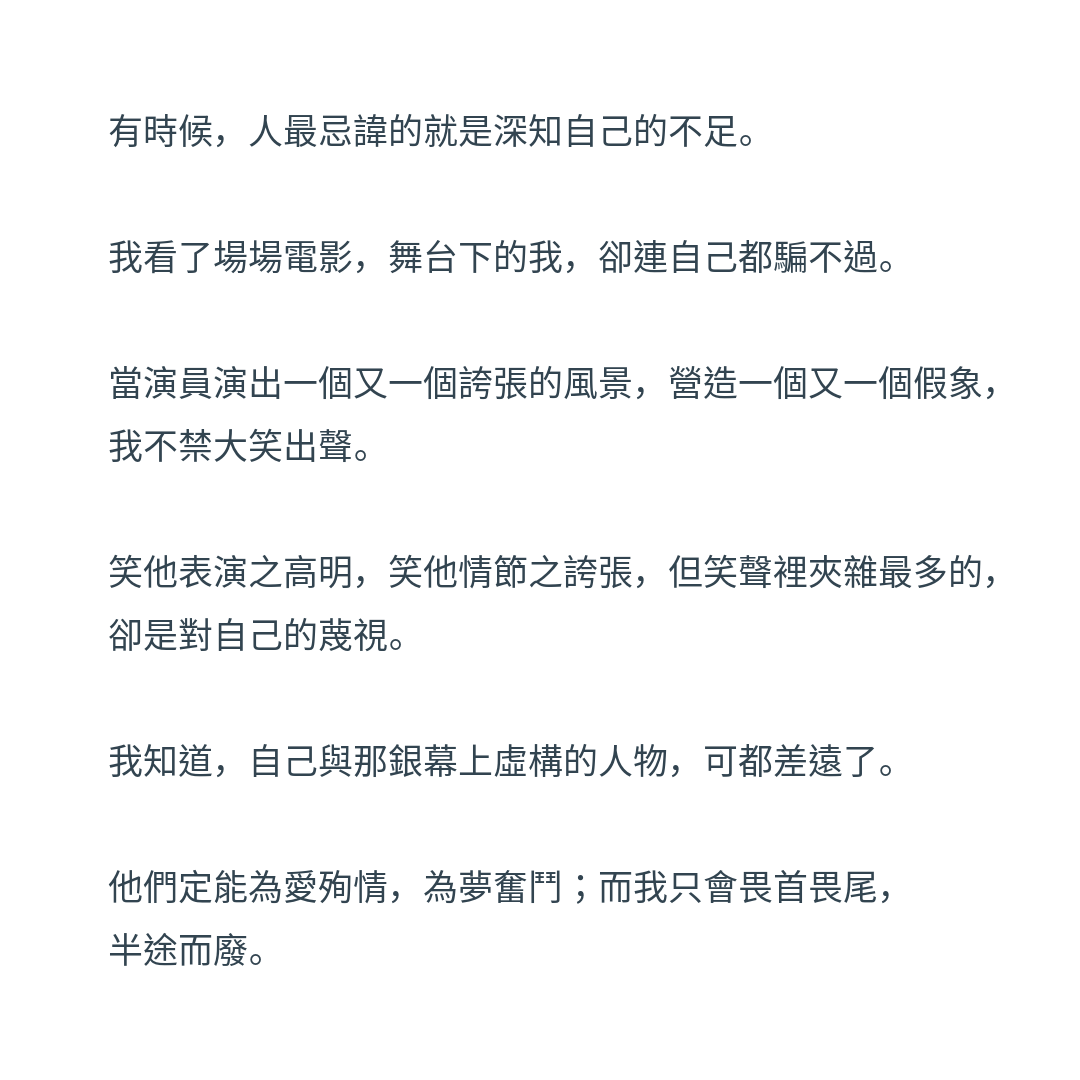

output/觀劇/3.png


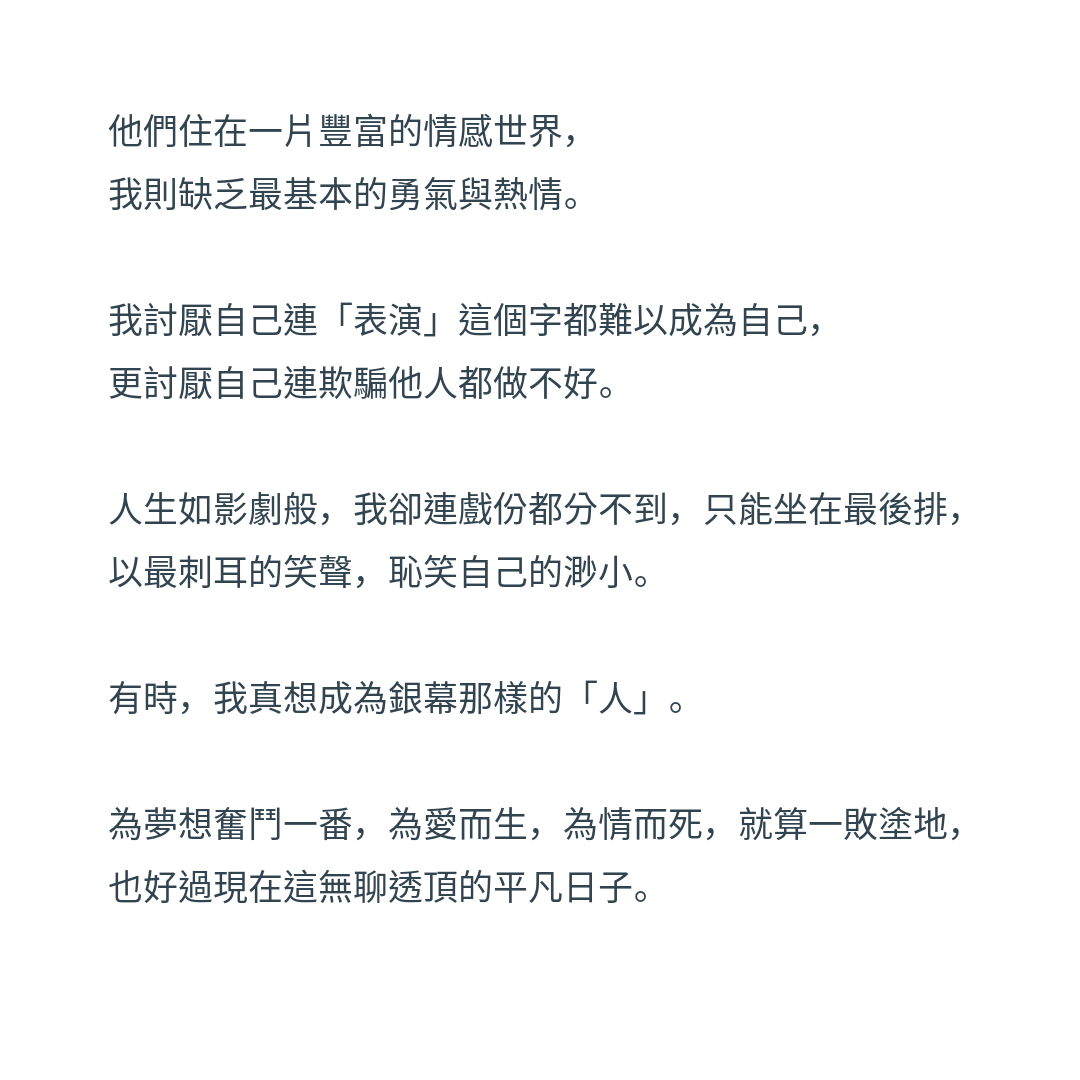

output/觀劇/4.png


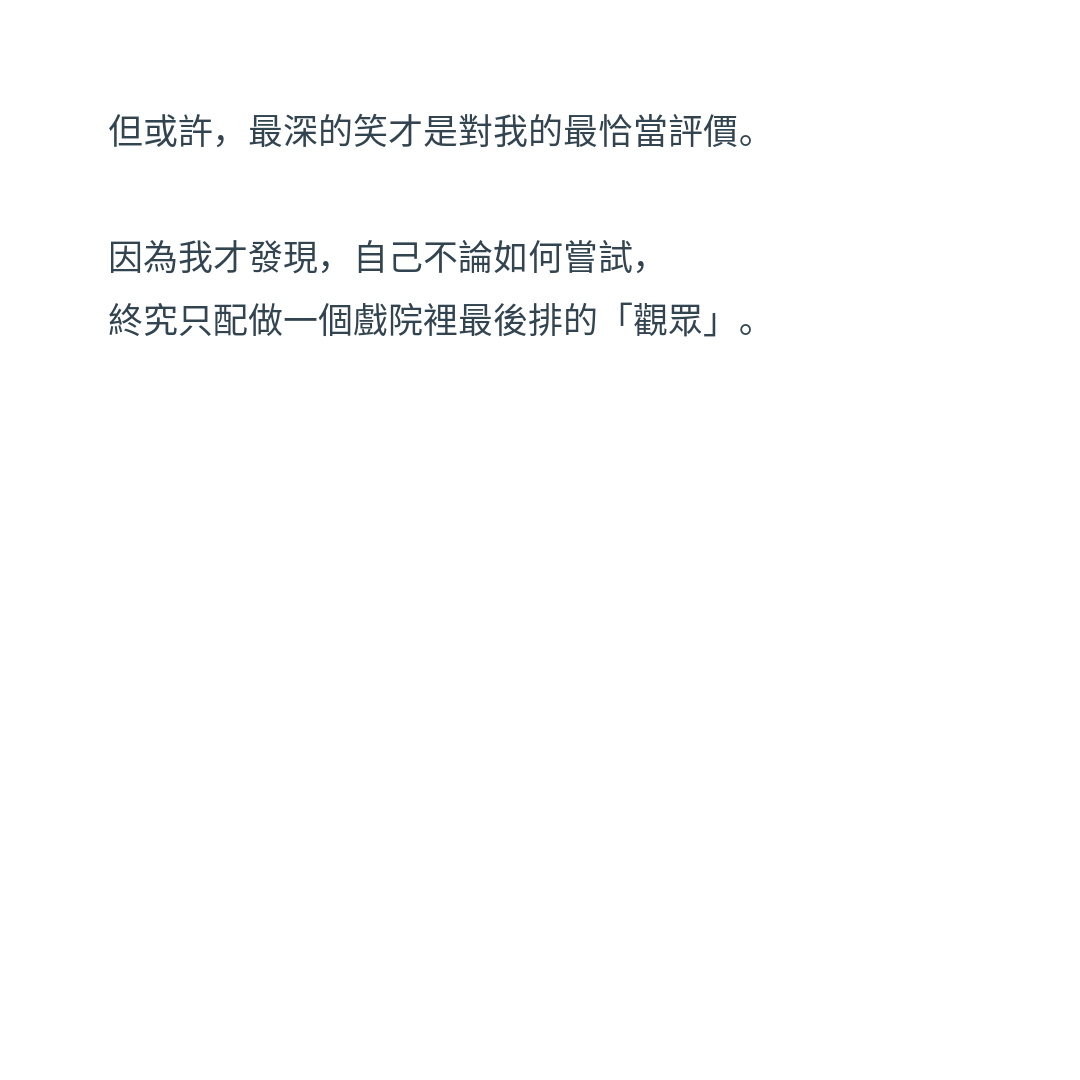

In [42]:
# Initialize the starting position of the text
x, y = MARGIN["x"], MARGIN["y"]
current_image = Image.new('RGB', (PAGE["x"], PAGE["y"]), color=BASE_COLOR)
draw = ImageDraw.Draw(current_image)


MAX_WIDTH = PAGE["x"] - 2 * MARGIN["x"]
MAX_Y = PAGE["y"] - MARGIN["y"] + PARAGRAPH_SPACING * 1.5

page_index = 2

for paragraph in paragraphs:
    if "<br>" in paragraph:
        y = PAGE["y"]
        continue
    paragraph += "\n"
    if y + getParagraphHeight(paragraph) + PARAGRAPH_SPACING > MAX_Y:
        # If not fit, make new image
        current_image.save(getPageName(page_index))
        print(getPageName(page_index))
        display(current_image)


        page_index += 1
        x, y = MARGIN["x"], MARGIN["y"]

        # New Image:
        current_image = Image.new('RGB', (PAGE["x"], PAGE["y"]), color=BASE_COLOR)
        draw = ImageDraw.Draw(current_image)

    # WRITE CODE HERE:
    def jptwStyledPunctuation(
            paragraph,
            pos = (x,y),
            font = FONT,
            spacing = LINE_SPACING,
            fill = TEXT_COLOR
            ):
        lines = paragraph.split("\n")
        current_pos = pos
        for line in lines:
            # Find commas and periods
            punctuation_regex = re.compile(r"[，。、]")
            punctuation_matches = punctuation_regex.finditer(line)
            line_index = 0

            # If there is no punctuation
            if not punctuation_regex.search(line):
                # Draw the text before the punctuation
                text_segment = line
                draw.text(
                    current_pos,
                    text=text_segment,
                    font=font,
                    fill=fill
                    )

            for punctuation_match in punctuation_matches:
                # Draw the text before the punctuation
                text_segment = line[line_index:punctuation_match.start()]
                draw.text(
                    current_pos,
                    text=text_segment,
                    font=font,
                    fill=fill
                    )
                line_index = punctuation_match.start() + 1

                # Draw the punctuation
                punctuation_char = line[punctuation_match.start()]
                punctuation_size = (int(font.getlength(punctuation_char)), FONT_SIZE)
                punctuation_offset = (punctuation_size[0] * 0.28,
                                    punctuation_size[1] * 0.28)
                punctuation_pos = (current_pos[0] + int(font.getlength(text_segment)) -
                                punctuation_offset[0],
                                current_pos[1] + punctuation_offset[1])

                draw.text(
                    punctuation_pos,
                    text=punctuation_char,
                    font=font,
                    fill=fill
                    )
                current_pos = (current_pos[0] + int(font.getlength(text_segment)) +
                            punctuation_size[0],
                            current_pos[1])
            draw.text(
                current_pos,
                text=line[line_index:],
                font=font,
                fill=fill
                )
            
            # End of line
            current_pos = (pos[0], current_pos[1] + FONT_SIZE + spacing)

    if isJPTWStyledPunctuation:
        jptwStyledPunctuation(paragraph)
    else:
        draw.multiline_text(
            (x, y),
            paragraph,
            fill=TEXT_COLOR,
            font=FONT,
            spacing=LINE_SPACING
            )
    y += getParagraphHeight(paragraph) + PARAGRAPH_SPACING
print(getPageName(page_index))
display(current_image)
current_image.save(getPageName(page_index))

---
# Cover Page
---

#### 1. OVERLAY_PATH
    Where the overlay is saved.
    (Default: "./assets/overlay.png")

#### 2. INPUT_DIRECTORY
    Where the images will be read from.
    (Default: "./input/")
    
#### 3. TITLE_OUTPUT_PATH
    Where the title will be output.
    (Default: "./output/1.png")

#### 4. TITLE_FONT_SIZE
    Font size of title
    (Default: 118)

#### 5. TITLE_LOCATION
    Location of title (top right)
    (Default: (60, 687))

#### 6. TITLE_FONT_COLOR
    Color of cover picture text
    (Default: TEXT_COLOR)

#### 7. TITLE_FONT
    ImageFont TrueType
    (Default: `ImageFont.truetype('./font/NotoSansTC-Regular.otf', size=TITLE_FONT_SIZE)`)

#### 8. TITLE_HIGHLIGHT_COLOR
    Background color of the text
    (Default: "#fff")

#### 9. TITLE_HIGHLIGHT_RIGHT_SPACING
    Spacing to the right (in pixels)
    (Default: 38)

In [43]:
OVERLAY_PATH = "./assets/overlay.png"
INPUT_DIRECTORY = "./input/"

def findInputFile():
    for file_name in os.listdir(INPUT_DIRECTORY):
        return INPUT_DIRECTORY + file_name
BACKGROUND_PATH = findInputFile()


TITLE_OUTPUT_PATH = getPageName(1)

TITLE_FONT_SIZE = 118
TITLE_LOCATION = (60, 687)
TITLE_FONT_COLOR = TEXT_COLOR

TITLE_FONT = ImageFont.truetype('./font/NotoSansTC-Regular.otf', size=TITLE_FONT_SIZE)

TITLE_HIGHLIGHT_COLOR = "#fff"
TITLE_HIGHLIGHT_RIGHT_SPACING = 38

In [44]:
# Forge the cover overlay

cover = Image.open(OVERLAY_PATH)

draw = ImageDraw.Draw(cover)


draw.rectangle(
    xy = (
        TITLE_LOCATION[0],
        TITLE_LOCATION[1],
        TITLE_LOCATION[0] + TITLE_FONT.getlength(TITLE) + TITLE_HIGHLIGHT_RIGHT_SPACING, TITLE_LOCATION[1] + TITLE_FONT_SIZE
    ),
    fill = TITLE_HIGHLIGHT_COLOR
)
draw.text(TITLE_LOCATION, TITLE, font=TITLE_FONT, fill=TITLE_FONT_COLOR)

cover.save(TITLE_OUTPUT_PATH)

In [45]:
import pygame

pygame.init()

# Set up the screen
screen_width = 600
screen_height = 600

scale_factor_x = screen_width / PAGE["x"]
scale_factor_y = screen_width / PAGE["y"]

screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption("Editor")

# Set up the overlay 
overlay = pygame.image.load(TITLE_OUTPUT_PATH)
scaled_overlay = pygame.transform.scale(
    overlay,
    (screen_width, screen_height)
)

# Set up the movable object
class MovableObject:
    pos = (0, 0)
    picture = pygame.image.load(BACKGROUND_PATH)
    scale = 1.0
    size = (picture.get_width(), picture.get_height())

    def __init__(self, picture_path = BACKGROUND_PATH):
        self.picture = pygame.image.load(picture_path)
    
    def getActualSize(self):
        return (
            int(self.size[0] / scale_factor_x),
            int(self.size[1] / scale_factor_y)
        )
    def getActualPos(self):
        return (
            int(self.pos[0] / scale_factor_x),
            int(self.pos[1] / scale_factor_y)
        )

    def transform(self, pos = (None, None), scale = -1):
        if pos != (None, None):
            self.pos = pos
        if scale != -1:
            self.scale = scale
            self.size = (self.picture.get_width() * self.scale,
                         self.picture.get_height() * self.scale)
    
    def setSize(self, size):
        self.size = size
        self.scale = size[0] / self.picture.get_width()

    def zoom(self, zoomtransform = 10):
        new_size = (self.size[0] + zoomtransform,
                    self.size[1] + zoomtransform * self.size[1] / self.size[0])
        self.setSize(new_size)

    def drawObject(self, screen):
        scaled_object = pygame.transform.scale(
            self.picture,
            self.size
        )
        screen.blit(scaled_object, self.pos)

# Create an Object
object = MovableObject()
dragging = False
drag_offset = (0, 0)
original_position = (0, 0)



# Display Loop
running = True
while running:
    keys = pygame.key.get_pressed()

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            drag_offset = (event.pos[0], event.pos[1])
            original_position = object.pos
            dragging = True

            # * ZOOMING
            isSlowScroll = keys[pygame.K_LCTRL] or keys[pygame.K_RCTRL]

            # Scroll wheel up
            if event.button == 4:
                if isSlowScroll:
                    object.zoom(10)
                else:
                    object.zoom(100)
            elif event.button == 5:
                if isSlowScroll:
                    object.zoom(-10)
                else:
                    object.zoom(-100)

        elif event.type == pygame.MOUSEBUTTONUP:
            dragging = False
        elif event.type == pygame.MOUSEMOTION:
            if dragging:
                x1 = event.pos[0] - drag_offset[0] + original_position[0]
                y1 = event.pos[1] - drag_offset[1] + original_position[1]
                object.transform(pos=(x1, y1))

    screen.fill(pygame.Color("#cccccc"))
    # Add Background
    object.drawObject(screen)

    # Add Overlay
    screen.blit(scaled_overlay, (0,0))
    pygame.display.update()

pygame.quit()

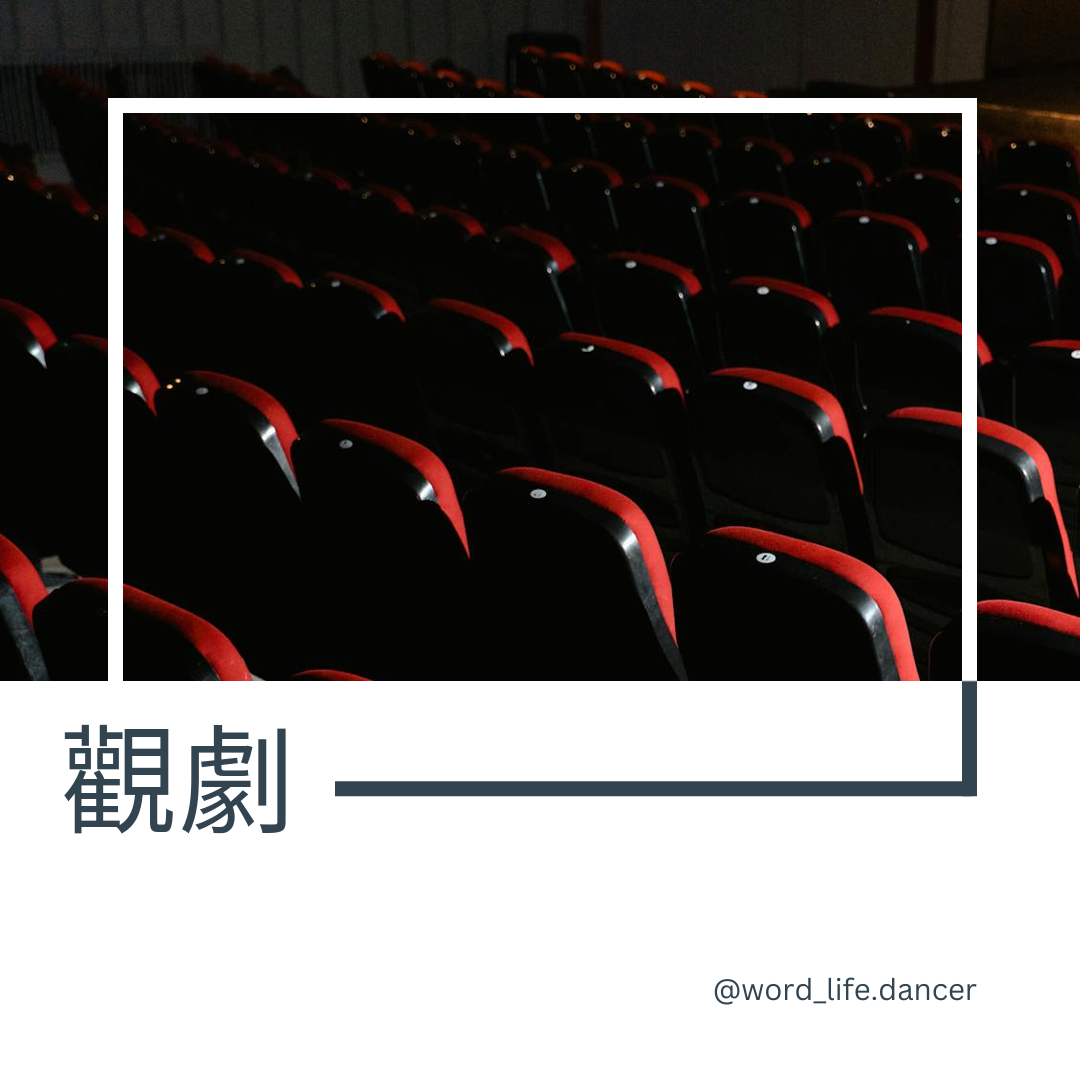

In [46]:
# Get Overlay
overlay_image = Image.open(TITLE_OUTPUT_PATH).convert("RGBA")

# Get Background
background_image = Image.open(BACKGROUND_PATH)
scaled_background_image = background_image.resize(object.getActualSize())

# Background 
canvas = Image.new(
    color="#cccccc",
    mode="RGBA",
    size=(PAGE["x"], PAGE["y"])
)


canvas.paste(scaled_background_image, object.getActualPos(), )
canvas.paste(overlay_image, (0,0), overlay_image)

canvas.show()

display(canvas)
canvas.save(TITLE_OUTPUT_PATH)